# PlaygroundML
---
# 2. $k$-Nearest Neighbours

In [1]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt

# My code for a kNN classifier
from kNN import my_train_test_split, myKNearestNeighbours

# Relevant sklearn import if one uses sklearn instead
from sklearn.neighbors import KNeighborsClassifier

## 2.1 $k$-NN classifier for mixture of two Gaussians
### 2.1.1 Generating train and test datasets
Here we generate a toy dataset by sampling from two 2D Gaussian distributions with the same covariance matrix $\mathbf{\Sigma}$ but different mean vectors $\mathbf{\mu}$. Data from each Gaussian is labelled with a $0$ (red) or $1$ (blue) respectively. The function `my_train_test_split()` from `kNN.py` shuffles the data and divides it into train and test sets. We also plot the toy data below.

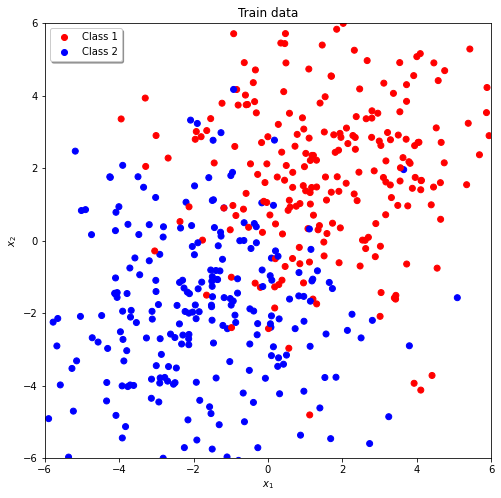

In [2]:
def generate_data(N, mu_1, mu_2, sigma):
    """
    Generate labelled data from two Gaussians with the same covariance matrix.
    
    Args:
        N (int): number of samples per class
        mu_1 (array): mean of the first Gaussian
        mu_2 (array): mean of the second Gaussian
        sigma (array): covariance matrix of both Gaussians
    
    Returns:
        X (array): data
        y (array): labels (0 or 1)
    """
    # Set the seed
    rng = np.random.RandomState(0)

    X = np.concatenate([rng.multivariate_normal(mu_1, sigma, N), rng.multivariate_normal(mu_2, sigma, N)])
    y = np.concatenate([np.zeros(N), np.ones(N)]).astype(int)

    return X, y

# Set the number of samples and parameters of the Gaussians
N = 300
mu_1 = np.array([2,2])
mu_2 = np.array([-2,-2])
sigma = 5 * np.eye(2)
colours = ['r', 'b']

# Generate the data and split it into train and test sets
X, y = generate_data(N, mu_1, mu_2, sigma)
X_train, y_train, X_test, y_test = my_train_test_split(X, y, test_size=0.2)

# Plot the data
plt.figure(figsize=(8,8))

# Plot scatter plot of the train data and label a single red and blue point with its class
plt.scatter(X_train[:,0], X_train[:,1], c=[colours[i] for i in y_train])

# Label the classes
for i in range(2):
    plt.scatter([], [], c=colours[i], label=f'Class {i+1}')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.title('Train data')
plt.legend(frameon=True, loc='upper left', shadow=True)
plt.show()

### 2.1.2 Performing $k$-NN for two-class classification
Now we fit a $k$-NN classifier to the training data, evaluate the accuracy (score) on the test data, and plot the decision boundary.

k = 1: score = 0.9083
k = 5: score = 0.9417
k = 25: score = 0.9167


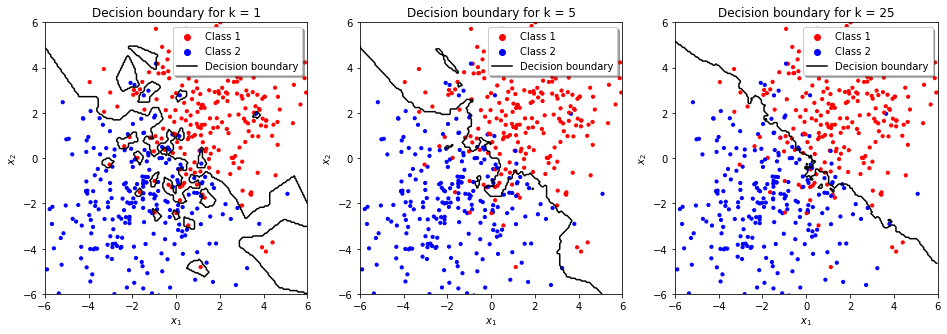

In [3]:
# Plot the decision boundary
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Set up meshgrid for plotting decision boundary
x1 = np.linspace(-6,6,200)
x2 = np.linspace(-6,6,200)
X1, X2 = np.meshgrid(x1,x2)

# Perform kNN classification to find decision boundary
for i, k in enumerate([1,5,25]):
    kNN_classifier = myKNearestNeighbours(k)

    # Fit the model
    kNN_classifier.fit(X_train, y_train)

    # Predict the labels of the test data
    y_pred = kNN_classifier.predict(X_test)

    # Print the accuracy on the test data
    print(f'k = {k}: score = {kNN_classifier.score(X_test, y_test):.4f}')

    # Plot the decision boundary
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    y_grid = kNN_classifier.predict(X_grid).reshape(X1.shape)
    axes[i].contour(X1, X2, y_grid, colors='black', levels=[0.5])
    axes[i].title.set_text(f'Decision boundary for k = {k}')

for ax in axes:
    # Label the classes and decision boundary
    for i in range(2):
        ax.scatter([], [], c=colours[i], label=f'Class {i+1}')
    ax.plot([], [], c='black', label='Decision boundary')

    ax.scatter(X_train[:,0], X_train[:,1], c=[colours[i] for i in y_train], s=10)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_xlim(-6,6)
    ax.set_ylim(-6,6)
    ax.legend(frameon=True, loc='upper right', shadow=True)

plt.show()

Decision boundaries are more irregular for smaller values of $k$, as can be seen above. In this example, $k=5$ exhibits the highest score out of the three $k$ values looked at.

The plots above can be evaluated in the exact same way using `sklearn`, by replacing `myKNearestNeighbours(k)` with the `sklearn.neighbors.kNeighborsClassifier(k)` class.